![Inspiring Math Students](DALL%C2%B7E%202024-12-30%2013.15.05%20-%20An%20inspiring%20and%20educational%20image%20featuring%20Black%20students%20engaged%20in%20solving%20math%20problems.%20The%20setting%20is%20a%20modern%20classroom%20with%20students%20working%20.webp)

# <p style="text-align: center;">Exploratory Data Analysis of Student Performance Data</p>

## Project description
This project aims to perform an exploratory data analysis on data relating to students academic performance in mathematics, reading and writing, using the *StudentsPerformance* dataset download on *Kaggle*. 

## Dataset Comprehension

-**gender**:the gender of the student (male and female).

---
-**race/ethnicity**: the ethnic group classification of the student, often grouped as categories (group A, group B, group C, group D, group E).

---
-**parental level of education**: the highest level of education attained by a parent or guardian (some high school, high school, some college, associate's degree, bachelor's degree, master's degree).

---
-**lunch**: the type of lunch the student receives, often indicative of socioeconomic status (standard, free/reduced).

---
-**test preparation course**: indicates whether the student completed a test preparation course before taking the exams (none, completed).

---
-**math score**: The student’s score in the mathematics test (0 to 100).

---
-**reading score**: the student’s score in the reading test (0 to 100).

---
-**writing score**: the student’s score in the writing test (0 to 100).

## Importing libraries

In [107]:
#Here I import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the Dataset

In [108]:
#Dataset loading
data = pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Overview

In [109]:
#Dataset shape
print("The dataset shape is: {}".format(data.shape))

The dataset shape is: (1000, 8)


In [110]:
#General informations about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Our dataset has 8 columns and 1000 rows with no missing values.**

## Data Cleaning

In [111]:
#Duplicated values
data.duplicated().sum()

0

In [112]:
#Checking the unique values of the categorical columns
cols = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]
for col in cols:
    print("Unique values of the {} column:".format(col))
    print(data[col].unique())
    print("\n-----------------------------------------------------\n")

Unique values of the gender column:
['female' 'male']

-----------------------------------------------------

Unique values of the race/ethnicity column:
['group B' 'group C' 'group A' 'group D' 'group E']

-----------------------------------------------------

Unique values of the parental level of education column:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

-----------------------------------------------------

Unique values of the lunch column:
['standard' 'free/reduced']

-----------------------------------------------------

Unique values of the test preparation course column:
['none' 'completed']

-----------------------------------------------------



**The dataset seem very clean, so we don't have any cleaning task to perform, we'll directly dive in the exploration.**

## Data Visualization

In [115]:
#Basic statistics for each numeric and categorical column.
score_columns = ['math score', 'reading score', 'writing score']
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
print(data[score_columns].describe())
print("\n------------------------------------------------\n")
print(data[categorical_columns].describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

------------------------------------------------

        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   

       test preparation course  
count                     1000  
unique                       2  
top                       none  
freq                       64

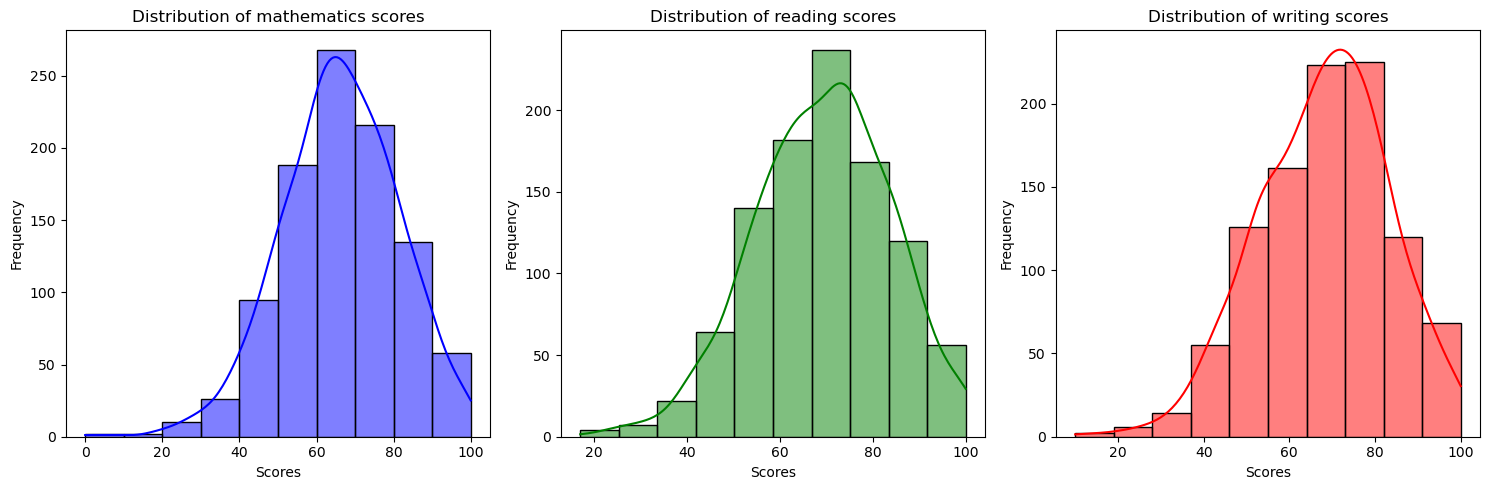

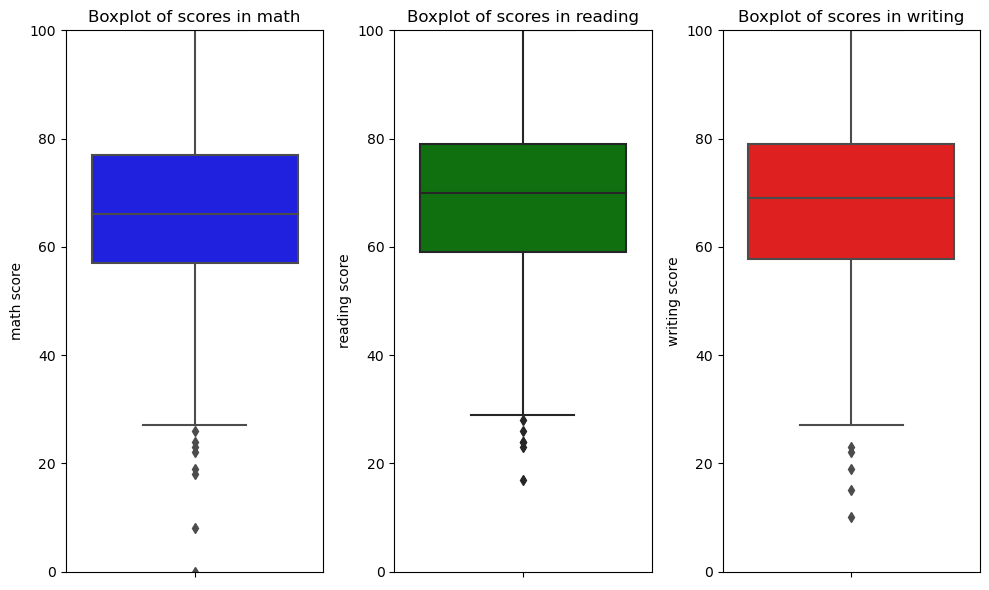

In [114]:
#Visualization of score distribution with histograms and boxplots in a for loop
score_columns = ['math score', 'reading score', 'writing score']
colors = ['blue', 'green', 'red']
titles = ['Distribution of mathematics scores', 'Distribution of reading scores', 'Distribution of writing scores']

#Histograms
plt.figure(figsize=(15, 5))
for i, col in enumerate(score_columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(data[col], kde=True, color=colors[i], bins=10)
    plt.title(titles[i])
    plt.xlabel('Scores')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#Boxplots
y_limits = (0,100)
plt.figure(figsize=(10, 6))
for i, col in enumerate(score_columns):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=data[col], color=colors[i])
    plt.title('Boxplot of scores in {}'.format(col.split()[0]))
    plt.ylim(y_limits)
plt.tight_layout()
plt.show()

**Histograms**: the histograms show that the scores in mathematics, reading, and writing follow an approximately normal distribution, with peaks around 60-80. The distributions for reading and writing are very similar, while mathematics scores exhibit a slight left skew, indicating a higher proportion of students with lower scores in this subject. This may suggest a need for additional focus on mathematics. <br> <br>
**Boxplots**: the boxplots illustrate the distribution of scores in mathematics, reading, and writing. All three subjects have similar median scores, with the central 50% of the data (the interquartile range) lying between approximately 60 and 80. However, mathematics shows more pronounced outliers on the lower end, indicating that a subset of students performed significantly worse in this subject compared to the others. This suggests a potential area for targeted support or intervention.

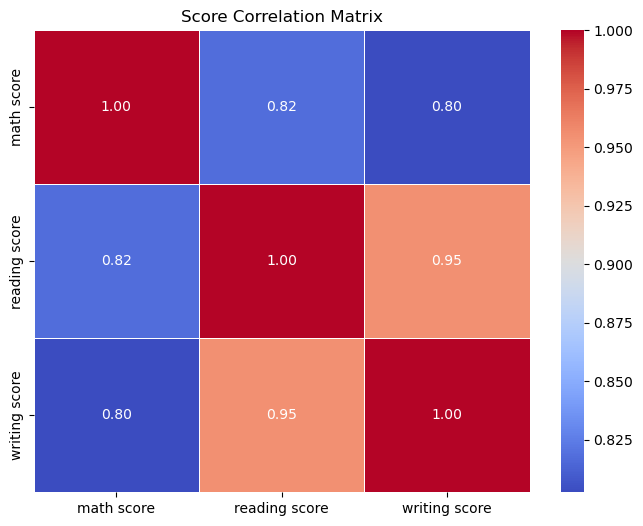

In [116]:
#Visualization of the correlation matrix heatmap
correlation_matrix = data[score_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Score Correlation Matrix')
plt.show()

The correlation matrix shows strong positive correlations among scores in mathematics, reading, and writing. The highest correlation is between reading and writing scores (0.95), suggesting that performance in these two areas is closely linked. Mathematics scores are also strongly correlated with reading (0.82) and writing (0.80), though slightly less so. These results indicate a consistent relationship across the three skill areas, with improvements in one area likely to be associated with improvements in the others.

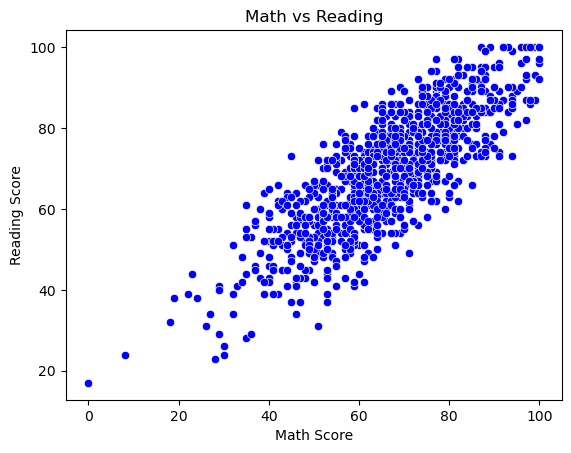

In [119]:
#Scatter plot between Math and Reading
sns.scatterplot(x=data['math score'], y=data['reading score'], color='blue')
plt.title('Math vs Reading')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.show()

**Math vs Reading**: the scatterplot shows a positive correlation between math scores and reading scores. Students who perform well in math tend to also achieve high scores in reading, as evidenced by the upward trend in the points. There is some variability, but the clustering around the diagonal indicates a strong relationship.

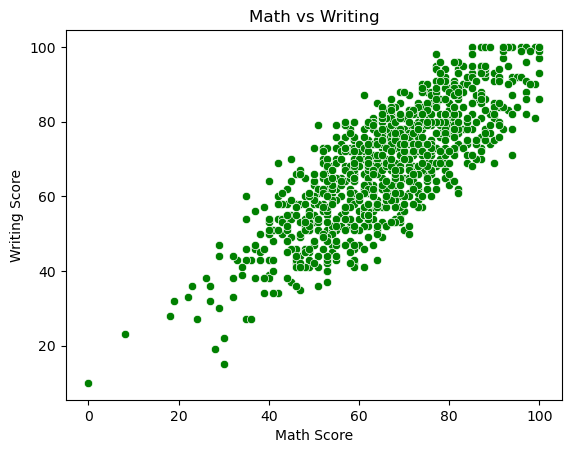

In [120]:
#Scatter plot between Math and Writing
sns.scatterplot(x=data['math score'], y=data['writing score'], color='green')
plt.title('Math vs Writing')
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.show()

**Math vs Writing**: the scatterplot illustrates a positive correlation between math and writing scores. Students with higher math scores generally have higher writing scores. The points are spread slightly wider than the Math vs Reading plot, which could indicate a slightly weaker correlation.

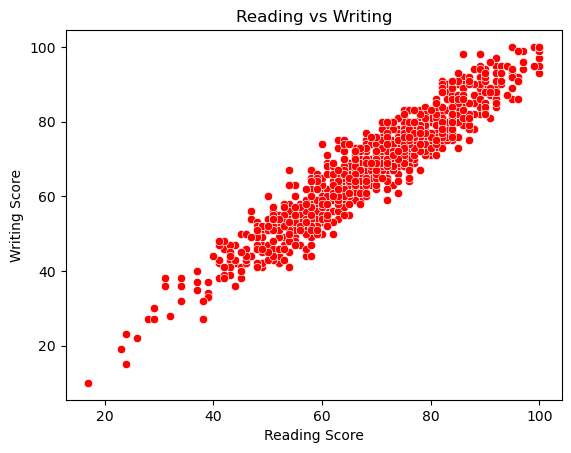

In [121]:
#Scatter plot between Reading and Writing
sns.scatterplot(x=data['reading score'], y=data['writing score'], color='red')
plt.title('Reading vs Writing')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

**Reading vs Writing**: this scatterplot demonstrates a very strong positive correlation between reading and writing scores. The points are tightly clustered along the diagonal, suggesting that students' abilities in reading and writing are closely related, with minimal variation between these two skills.

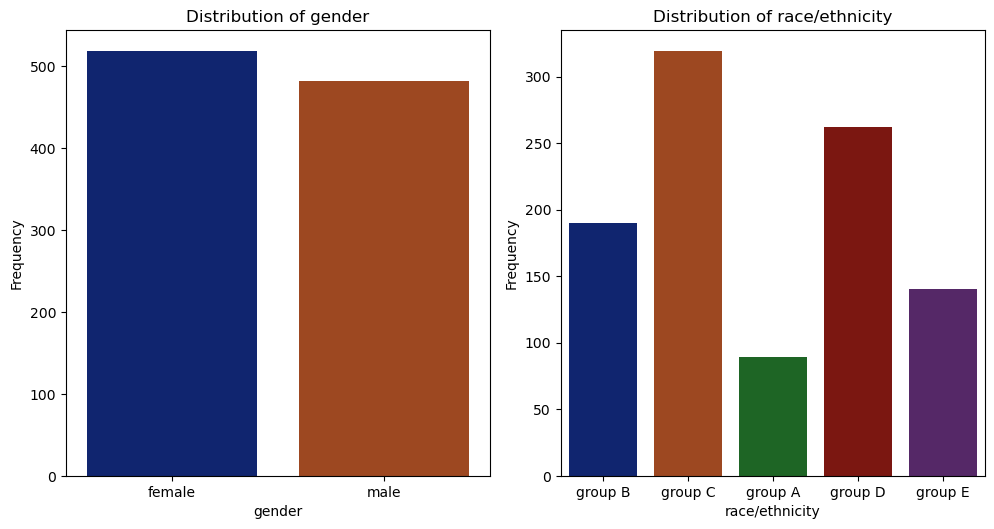

In [122]:
#Visualization of data distribution in categorical columns with countplots
cat_columns_1 = ['gender', 'race/ethnicity']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_columns_1):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=data[col], palette='dark')
    plt.title('Distribution of {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

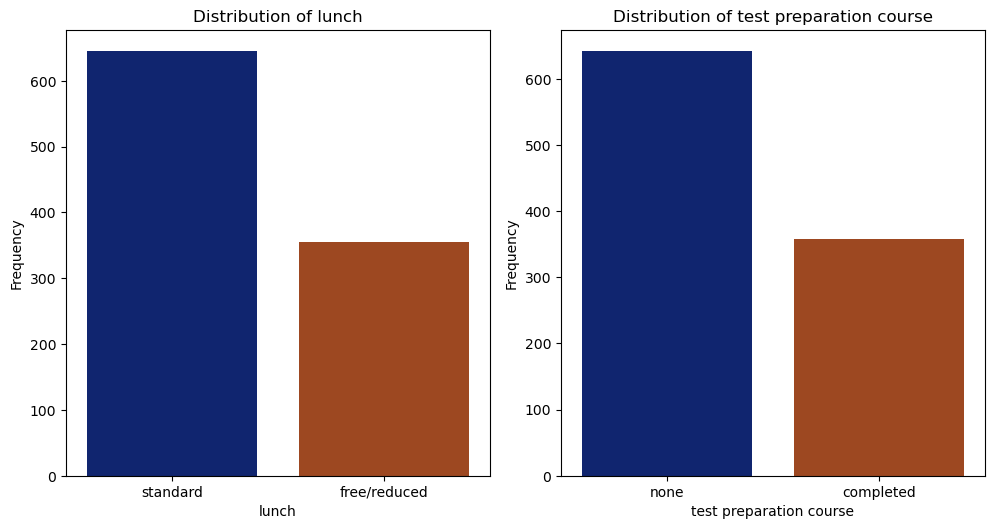

In [77]:
#Visualization of data distribution in categorical columns with countplots
cat_columns_2 = ['lunch', 'test preparation course']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_columns_2):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=data[col], palette='dark')
    plt.title('Distribution of {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

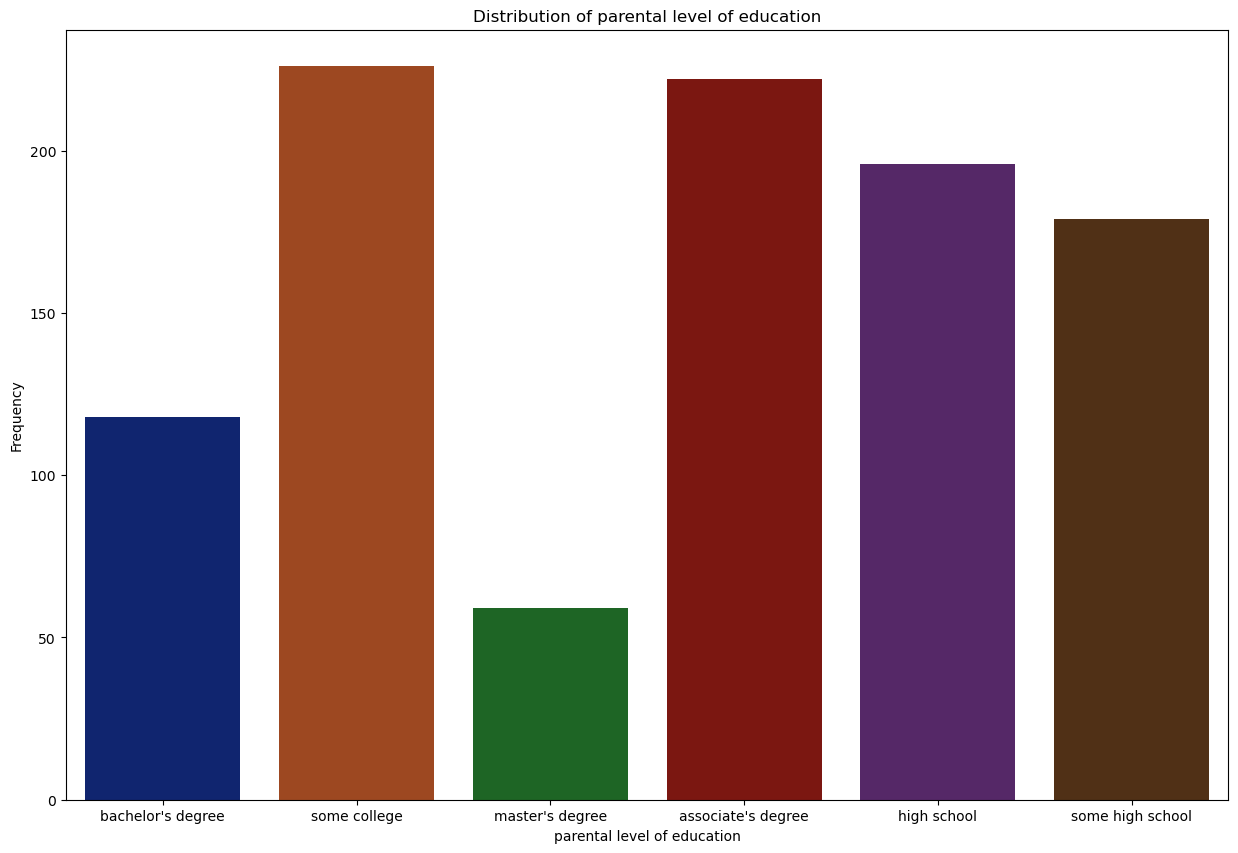

In [101]:
#Visualization of data distribution in categorical columns with countplots
plt.figure(figsize=(15, 10))
sns.countplot(x=data['parental level of education'], palette='dark')
plt.title('Distribution of parental level of education')
plt.xlabel('parental level of education')
plt.ylabel('Frequency')
plt.show()

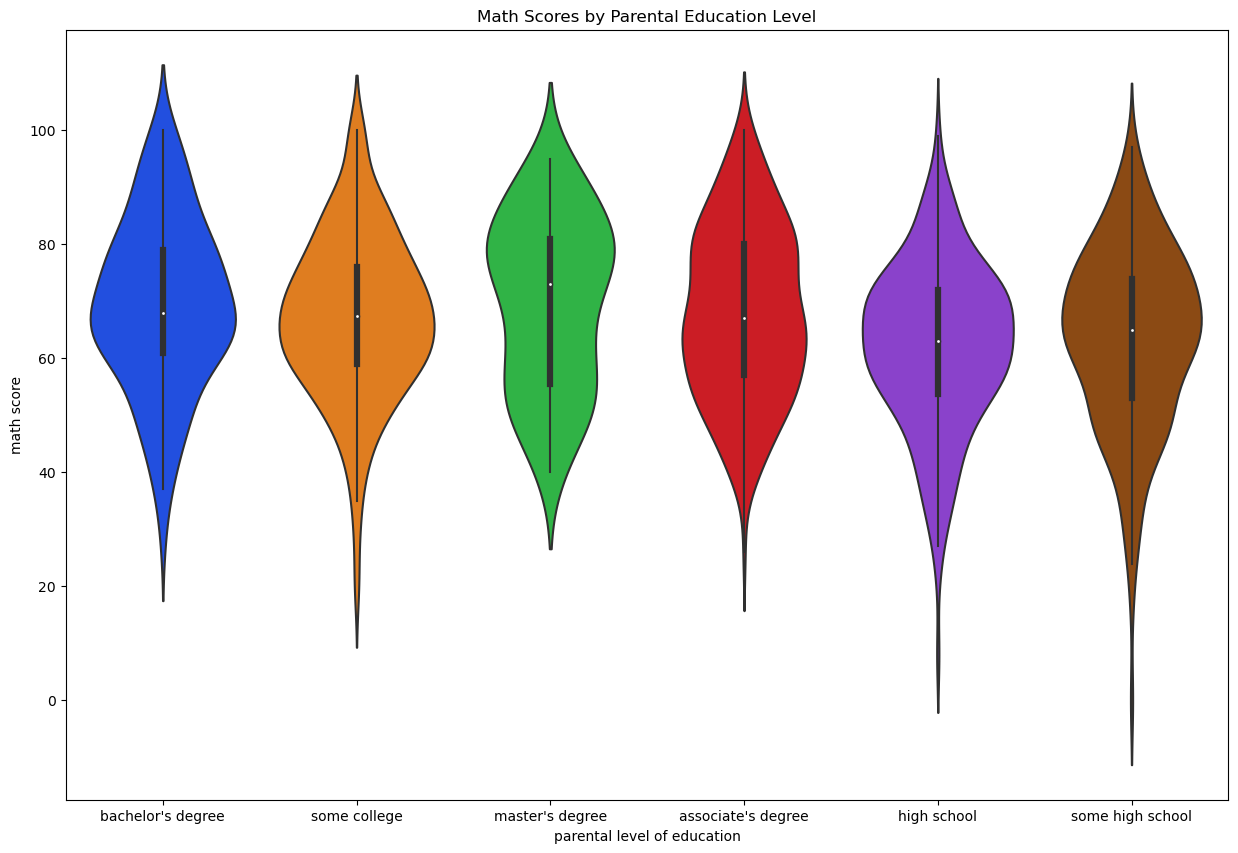

In [102]:
#Violinplot of mathematics scores by parental education level
plt.figure(figsize=(15, 10))
sns.violinplot(x='parental level of education', y='math score', data=data, palette='bright')
plt.title('Math Scores by Parental Education Level')
plt.show()

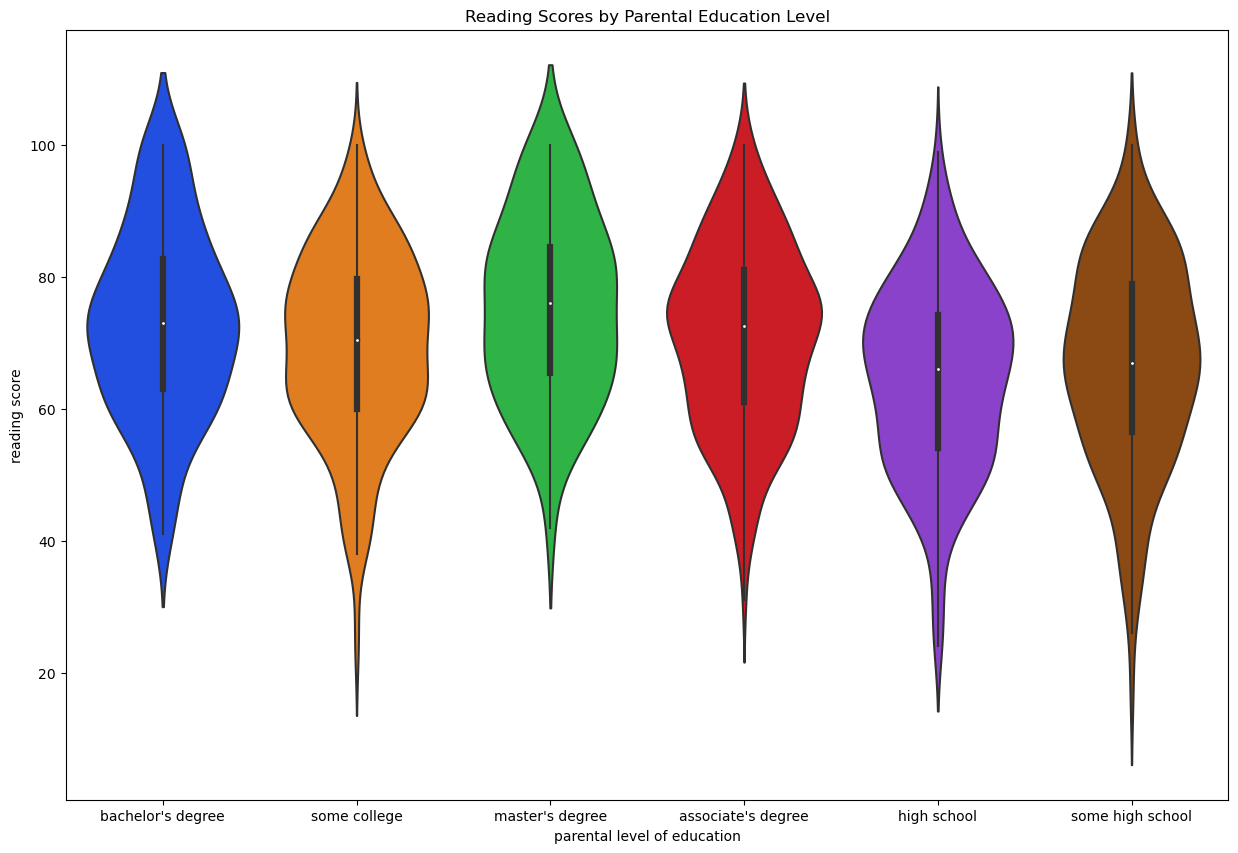

In [103]:
#Violinplot of reading scores by parental education level
plt.figure(figsize=(15, 10))
sns.violinplot(x='parental level of education', y='reading score', data=data, palette='bright')
plt.title('Reading Scores by Parental Education Level')
plt.show()

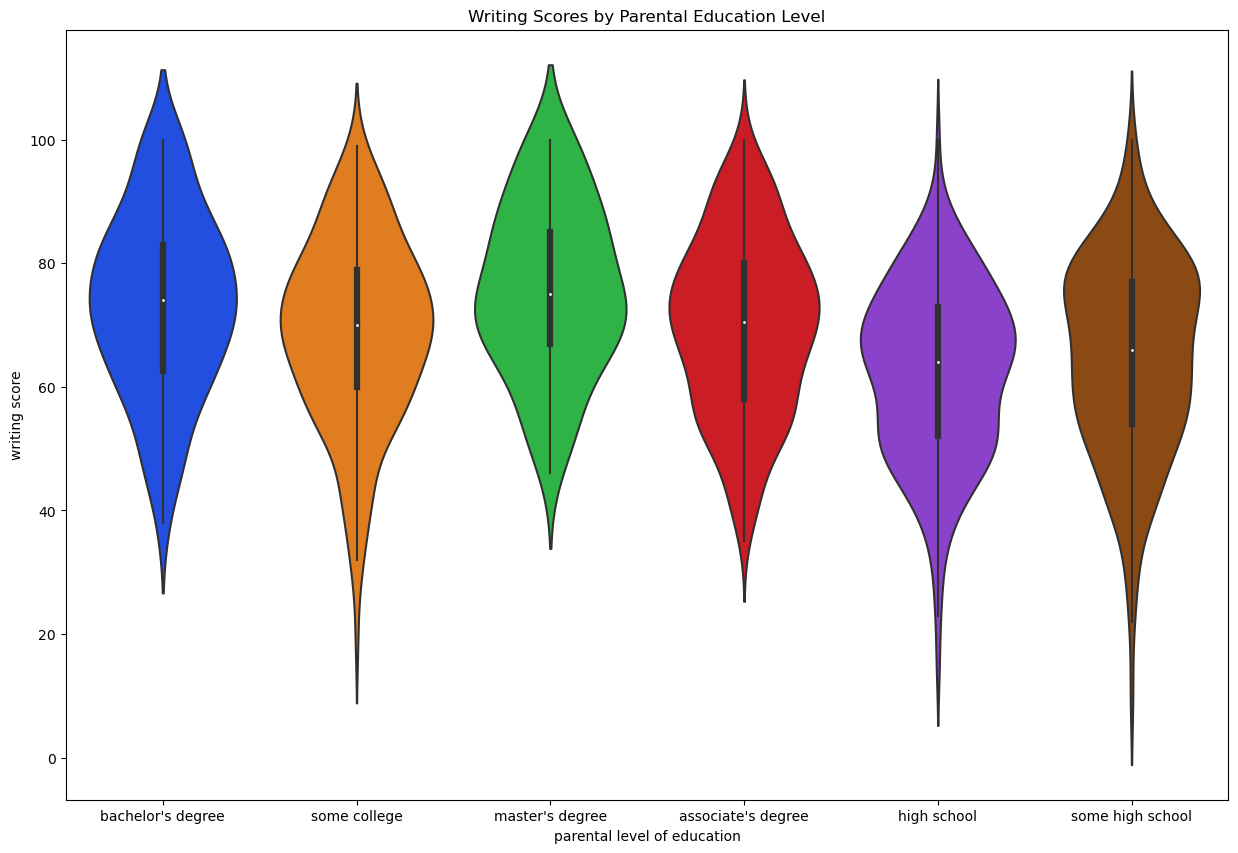

In [104]:
#Violinplot of writing scores by parental education level
plt.figure(figsize=(15, 10))
sns.violinplot(x='parental level of education', y='writing score', data=data, palette='bright')
plt.title('Writing Scores by Parental Education Level')
plt.show()

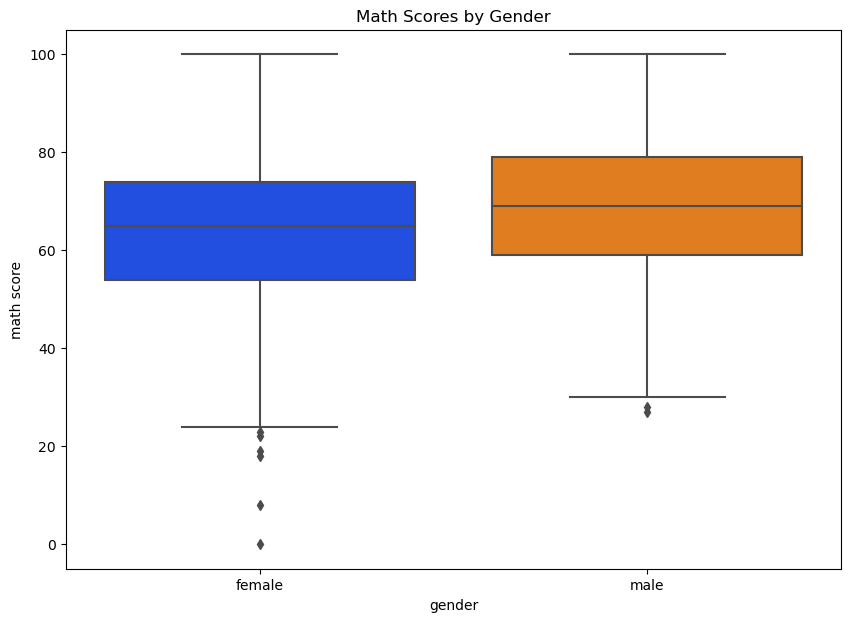

In [96]:
#Boxplot of math scores by gender
plt.figure(figsize=(10, 7))
sns.boxplot(x='gender', y='math score', data=data, palette='bright')
plt.title('Math Scores by Gender')
plt.show()

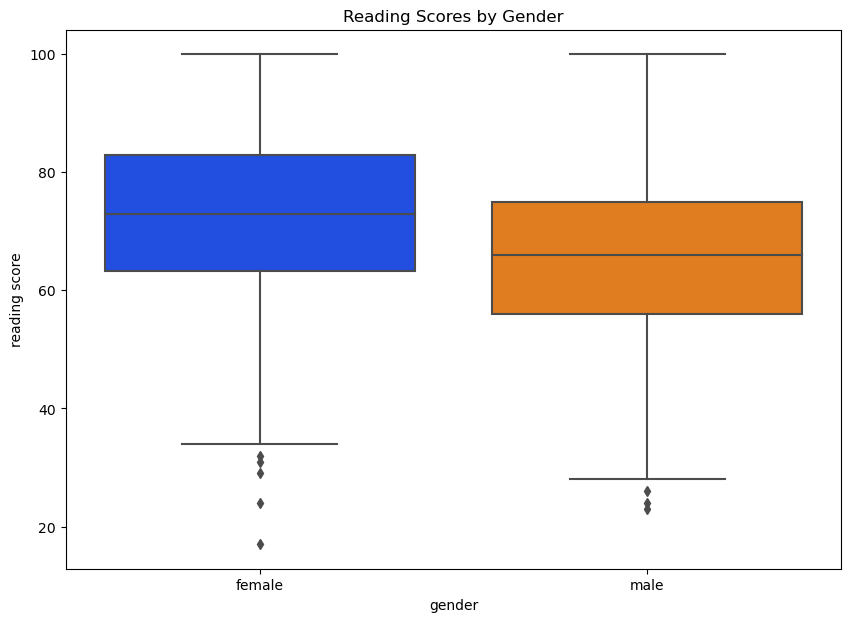

In [123]:
#Boxplot of reading scores by gender
plt.figure(figsize=(10, 7))
sns.boxplot(x='gender', y='reading score', data=data, palette='bright')
plt.title('Reading Scores by Gender')
plt.show()

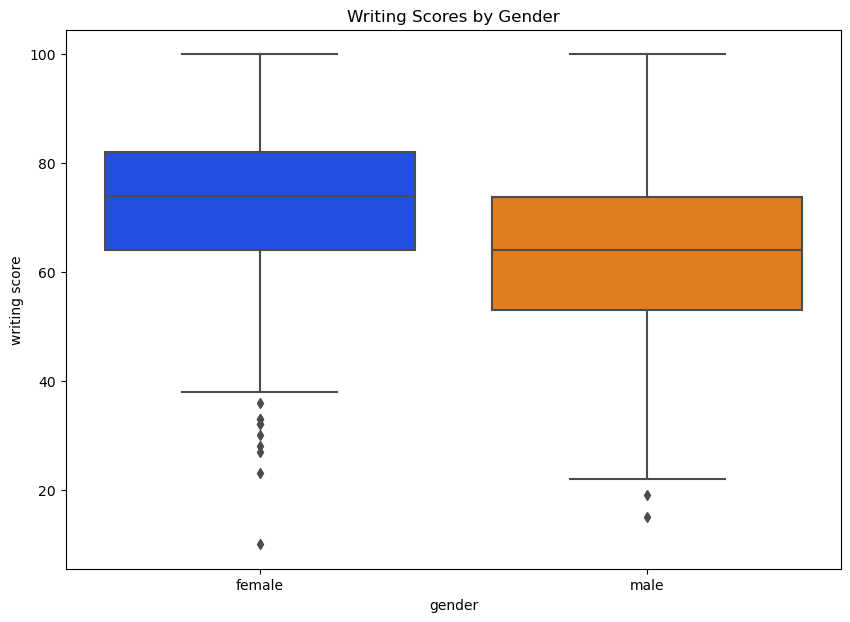

In [124]:
#Boxplot of writing scores by gender
plt.figure(figsize=(10, 7))
sns.boxplot(x='gender', y='writing score', data=data, palette='bright')
plt.title('Writing Scores by Gender')
plt.show()

## Insights and Key Findings

- **Score Analysis**:
mathematics scores show a slight left skew with more students scoring lower compared to reading and writing.
Reading and writing scores are very similar, with a strong positive correlation (0.95) between them.
Mathematics scores are also positively correlated with reading (0.82) and writing (0.80).
- **Gender Insights**:
male students tend to perform better in mathematics, as observed in boxplots.
Female students excel in reading and writing, with higher median scores compared to males.
- **Parental Education Level**:
students whose parents have higher education levels (bachelor's/master's degrees) tend to score higher across all subjects.
Violin plots show more variability in scores among students whose parents have lower education levels.
- **Ethnic Group Disparities**:
the distribution of scores varies among different race/ethnicity groups, suggesting potential differences in performance patterns.
- **Subject Relationships**:
strong correlations between reading and writing suggest that literacy skills are closely linked.
The relationship between math and literacy skills, though positive, is slightly weaker than the reading-writing connection.
These insights highlight the need for tailored interventions, particularly in mathematics, for underperforming groups and underscore the importance of socioeconomic and educational support systems.

## Conclusion

**The exploratory data analysis provided valuable insights into the distribution of scores and relationships between variables. It revealed that most students have relatively high scores, with variations in performance based on factors like gender and parental education level. The analysis of categorical variables showed how these factors influence student performance, with differences observed between genders and parental education levels. This initial analysis lays the foundation for further investigations, such as correlation analysis and predictive modeling.**